## Myokyung Han (20224230)

## 1. Download Data

In [1]:
# krw_usd_xr.xlsx

In [2]:
import pandas as pd

In [3]:
df_xr = pd.read_excel('./data/krw_usd_xr.xlsx')
# skiprows = 1 >> 이번엔 스킵할 필요가 없음

In [4]:
df_xr.head(3)

,날짜,주요국통화의 대원화 환율 - 원/미국달러(매매기준율)
0,1964-05-04,255.77
1,1964-05-05,255.77
2,1964-05-06,255.77


In [5]:
df_xr.tail(3)

,날짜,주요국통화의 대원화 환율 - 원/미국달러(매매기준율)
16400,2022-03-15,1238.6
16401,2022-03-16,1241.7
16402,2022-03-17,1240.4


In [6]:
df_xr['날짜'] = pd.to_datetime(df_xr['날짜'])

In [7]:
df_xr.set_index('날짜' , inplace=True)

In [8]:
df_xr.columns = ['KRW/USD']

In [9]:
df_xr.head()

,KRW/USD
날짜,
1964-05-04,255.77
1964-05-05,255.77
1964-05-06,255.77
1964-05-07,255.77
1964-05-08,255.77


In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.rcParams['figure.figsize'] = (8,4)

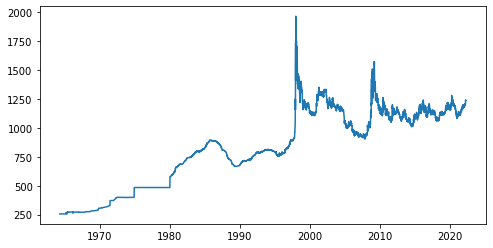

In [12]:
plt.plot(df_xr['KRW/USD'])
plt.show()

In [13]:
# 1997 이후 정부개입을 막으면서 환율이 횡보하기 시작함

## pegged exchange rate system until 1980

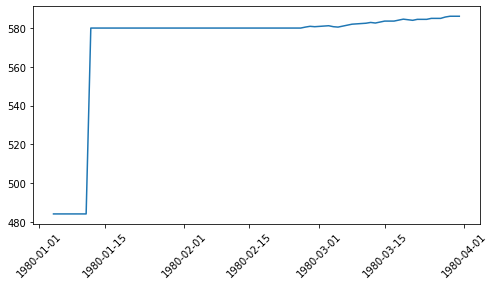

In [14]:
plt.plot(df_xr.loc['1980-01-01': '1980-03-31']['KRW/USD'])
plt.xticks(rotation=45)
plt.show()

In [15]:
df_xr = df_xr.loc['1980-03-01': ]

In [16]:
df_xr.head()

,KRW/USD
날짜,
1980-03-03,581.2
1980-03-04,580.7
1980-03-05,580.5
1980-03-06,581.0
1980-03-07,581.5


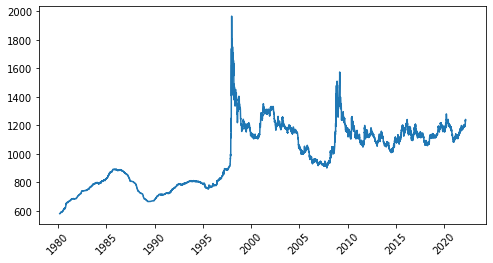

In [17]:
df_xr = df_xr.loc['1980-03-01':]
plt.plot(df_xr['KRW/USD'])
plt.xticks(rotation=45)
plt.show()

## 2. Convert to monthly observation

### (1) monthly average - old and hard way

In [18]:
df_xr.head(10)

,KRW/USD
날짜,
1980-03-03,581.2
1980-03-04,580.7
1980-03-05,580.5
1980-03-06,581.0
1980-03-07,581.5
1980-03-08,582.0
1980-03-11,582.5
1980-03-12,582.9
1980-03-13,582.6


### (1) group-by

In [19]:
df_xr.index

DatetimeIndex(['1980-03-03', '1980-03-04', '1980-03-05', '1980-03-06',
               '1980-03-07', '1980-03-08', '1980-03-11', '1980-03-12',
               '1980-03-13', '1980-03-14',
               ...
               '2022-03-03', '2022-03-04', '2022-03-07', '2022-03-08',
               '2022-03-10', '2022-03-11', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17'],
              dtype='datetime64[ns]', name='날짜', length=11700, freq=None)

In [20]:
# WOW!!!!!!!!!!!
df_xr['ym'] = df_xr.index.year*100+df_xr.index.month

In [21]:
df_xr.head()

,KRW/USD,ym
날짜,,
1980-03-03,581.2,198003
1980-03-04,580.7,198003
1980-03-05,580.5,198003
1980-03-06,581.0,198003
1980-03-07,581.5,198003


In [22]:
df_xr.groupby('ym').mean()[['KRW/USD']]

,KRW/USD
ym,
198003,583.504167
198004,589.808000
198005,593.600000
198006,598.945833
198007,605.400000
...,...
202111,1182.909091
202112,1183.700000
202201,1194.005000


In [23]:
df_xr.groupby('ym')[['KRW/USD']].mean()

,KRW/USD
ym,
198003,583.504167
198004,589.808000
198005,593.600000
198006,598.945833
198007,605.400000
...,...
202111,1182.909091
202112,1183.700000
202201,1194.005000


In [24]:
del df_xr['ym']

In [25]:
type( df_xr.resample('M'))

pandas.core.resample.DatetimeIndexResampler

### (2) easy way!

In [26]:
# M 대신에 Y , Q를 넣어서 샘플링 가능함
df_xr.resample('M')['KRW/USD'].mean()

날짜
1980-03-31     583.504167
1980-04-30     589.808000
1980-05-31     593.600000
1980-06-30     598.945833
1980-07-31     605.400000
                 ...     
2021-11-30    1182.909091
2021-12-31    1183.700000
2022-01-31    1194.005000
2022-02-28    1198.338889
2022-03-31    1224.309091
Freq: M, Name: KRW/USD, Length: 505, dtype: float64

### (3) end-of-month observation

In [27]:
help(pd.DataFrame.resample)

Help on function resample in module pandas.core.frame:

resample(self, rule, axis=0, closed: 'str | None' = None, label: 'str | None' = None, convention: 'str' = 'start', kind: 'str | None' = None, loffset=None, base: 'int | None' = None, on=None, level=None, origin: 'str | TimestampConvertibleTypes' = 'start_day', offset: 'TimedeltaConvertibleTypes | None' = None) -> 'Resampler'
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time series.
    The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-sampling. For `Series` this
        will defa

In [28]:
df_monthly = df_xr.resample('M').last()
# 환율은 시점으로 보는것이 더 좋다 (평균보다) liquidity가 높으니까 가장 최근 정보를 취하는것이 맞다

In [29]:
df_monthly.head(5)

,KRW/USD
날짜,
1980-03-31,586.1
1980-04-30,590.5
1980-05-31,596.2
1980-06-30,603.0
1980-07-31,612.7


## Forcast Exchange Rate : Wrong Way

In [30]:
import statsmodels.api as sm

$$
    P_{t+1} = \alpha + \beta \, P_t + \epsilon_{t+1}
$$

In [31]:
# constant term 이 더해진다 알파로

$$
    P_{t+1} = \alpha \cdot 1 + \beta \, P_t + \epsilon_{t+1}
$$

오늘로 내일을 예측한다

In [32]:
X = df_monthly.iloc[:-1]
X = sm.add_constant(X)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
X.tail(3)

,const,KRW/USD
날짜,,
2021-12-31,1.0,1185.5
2022-01-31,1.0,1202.4
2022-02-28,1.0,1202.7


In [34]:
Y = df_monthly.iloc[1:]

In [35]:
Y.tail(3)

,KRW/USD
날짜,
2022-01-31,1202.4
2022-02-28,1202.7
2022-03-31,1240.4


In [36]:
# OLS - ordinary least squares
model = sm.OLS(Y, X.values)

In [37]:
result = model.fit()

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                KRW/USD   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:21:58   Log-Likelihood:                -2507.9
No. Observations:                 504   AIC:                             5020.
Df Residuals:                     502   BIC:                             5028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7637      7.611      2.334      0.020       2.811      32.716
x1             0.9833      0.008    130.349      0.000       0.969       0.998
==============================================================================
Omnibus:                      171.437   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7439.204
Skew:                           0.696   Prob(JB):                         0.00
Kurtosis:                      21.770   Cond. No.                     4.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### correct way : predict not price but returns

### (1) How to compute returns : shift

In [39]:
df_monthly['lagged'] = df_monthly['KRW/USD'].shift(1)

In [40]:
df_monthly['ret1'] =\
(df_monthly['KRW/USD']/df_monthly['lagged']-1)*100

In [41]:
df_monthly.head()

,KRW/USD,lagged,ret1
날짜,,,
1980-03-31,586.1,NaN,NaN
1980-04-30,590.5,586.1,0.750725
1980-05-31,596.2,590.5,0.965284
1980-06-30,603.0,596.2,1.140557
1980-07-31,612.7,603.0,1.608624


### (1) pct_change

In [42]:
df_monthly['ret2'] = df_monthly['KRW/USD'].pct_change(1)*100

In [43]:
df_monthly.head()

,KRW/USD,lagged,ret1,ret2
날짜,,,,
1980-03-31,586.1,NaN,NaN,NaN
1980-04-30,590.5,586.1,0.750725,0.750725
1980-05-31,596.2,590.5,0.965284,0.965284
1980-06-30,603.0,596.2,1.140557,1.140557
1980-07-31,612.7,603.0,1.608624,1.608624


### Summary state

In [44]:
df_monthly['ret1'].describe()

count    504.000000
mean       0.189410
std        2.882949
min      -15.931955
25%       -0.788630
50%        0.072435
75%        0.907373
max       21.601650
Name: ret1, dtype: float64

$$
    \frac{X -\mu}{\sigma} 
$$

In [45]:
summary = df_monthly['ret1'].describe()

In [46]:
norm_min = (summary['min'] -summary['mean'])/ summary['std']
norm_max = (summary['max'] -summary['mean'])/ summary['std']

# 정규화를 마치면 평균은 0 분산, 표준편차는 1인 표준정규분포의 모양을 가진다
# 그렇기 때문에 정규화한 아래 min, max값의 결과로 보면
# min기준 5시그마만큼 max기준 7시그마만큼 떨어진걸 확인할 수 있다

# 정규화를 가정하고 데이터를 보았지만 아니라는것을 알 수 있다, 왜

In [47]:
print(norm_min)
print(norm_max)

-5.591970085068331
7.427199784382415


In [59]:
summary

count    504.000000
mean       0.189410
std        2.882949
min      -15.931955
25%       -0.788630
50%        0.072435
75%        0.907373
max       21.601650
Name: ret1, dtype: float64

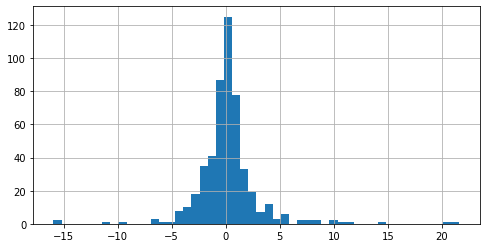

In [48]:
df_monthly['ret1'].hist(bins=50)
plt.show()

### Predict XR return2

In [49]:
df_monthly = df_monthly.dropna()

In [50]:
X = df_monthly.iloc[:-1]['ret1']
X = sm.add_constant(X)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
Y = df_monthly.iloc[1:]['ret1']

In [52]:
# OLS - ordinary least squares
model = sm.OLS(Y, X.values)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ret1   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     14.78
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           0.000137
Time:                        13:24:06   Log-Likelihood:                -1239.0
No. Observations:                 503   AIC:                             2482.
Df Residuals:                     501   BIC:                             2490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1572      0.127      1.236      0.217      -0.093       0.407
x1             0.1694      0.044      3.844      0.000       0.083       0.256
==============================================================================
Omnibus:                      153.258   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4463.410
Skew:                           0.660   Prob(JB):                         0.00
Kurtosis:                      17.534   Cond. No.                         2.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

momentum<=> contrarian  
상관계수가 양수이므로 비율이 오를수록 환율도 증가할것이라고 생각할순 있지만 이것도 문제가 있다.

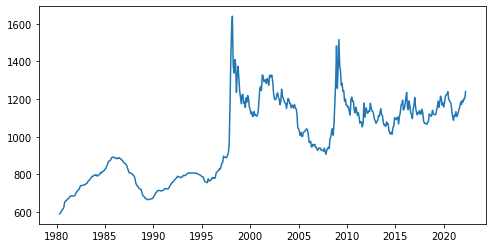

In [53]:
plt.plot(df_monthly['KRW/USD'])
plt.show()

1997 IMF 이전에는 모멘텀이 보이지만...그 이후에는 아니다...?

In [54]:
df_post_imf = df_monthly.loc['1999-01-01':]

In [55]:
df_post_imf.tail()

,KRW/USD,lagged,ret1,ret2
날짜,,,,
2021-11-30,1193.4,1171.7,1.852010,1.852010
2021-12-31,1185.5,1193.4,-0.661974,-0.661974
2022-01-31,1202.4,1185.5,1.425559,1.425559
2022-02-28,1202.7,1202.4,0.024950,0.024950
2022-03-31,1240.4,1202.7,3.134614,3.134614


In [56]:
XX = df_post_imf.iloc[:-1]['ret1']
XX = sm.add_constant(XX)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
YY = df_post_imf.iloc[1:]['ret1']

In [58]:
# OLS - ordinary least squares
models = sm.OLS(YY, XX.values)
results1 = models.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ret1   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.264
Time:                        13:24:34   Log-Likelihood:                -694.63
No. Observations:                 278   AIC:                             1393.
Df Residuals:                     276   BIC:                             1401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0654      0.177      0.369      0.712      -0.283       0.414
x1            -0.0672      0.060     -1.119      0.264      -0.186       0.051
==============================================================================
Omnibus:                       62.583   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.049
Skew:                           0.729   Prob(JB):                     1.33e-82
Kurtosis:                       8.516   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

안녕하세요 교수님!
수업이 정말 너무너무너무 재미있습니다ㅜ 
(표현이 너무 저급하여 죄송합니다ㅜ)
지난날 주가로 주가를 예측한 멍청한 제가 생각나며 소름이 돋았습니다
알찬 강의 만들어주셔서 진심 감사드립니다
앞으로도 잘 부탁드려요~!